# Sales Prediction


#### An Internship Project By 'Md Ayyan' @Codsoft On Linear Regression Model which predicts sales based on the money spent on different platforms for marketing using a simple linear regression.
Dataset given in ISLR  , downloaded from Kaggle that shows the relationship between 'TV advertising' and 'sales'.


## Reading and Understanding the Data

In [3]:



import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# pip install seaborn

In [6]:
advertising = pd.DataFrame(pd.read_csv(r"D:\ayyan\CODE\CODEsoft\Sales Prediction\advertising.csv"))
advertising.head(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


In [8]:
advertising.sample(2)

,TV,Radio,Newspaper,Sales
49,66.9,11.7,36.8,9.7
37,74.7,49.4,45.7,14.7


In [9]:
advertising.shape

(200, 4)

In [10]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:

advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

## Outlier Analysis


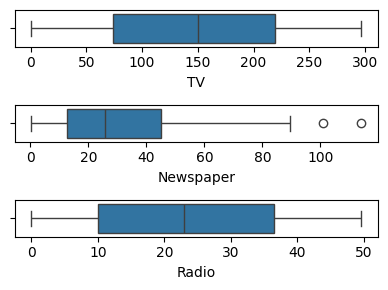

In [25]:
fig, axs = plt.subplots(3, figsize = (4,3))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0], orient='h')
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1], orient='h')
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2], orient='h')
plt.tight_layout()

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

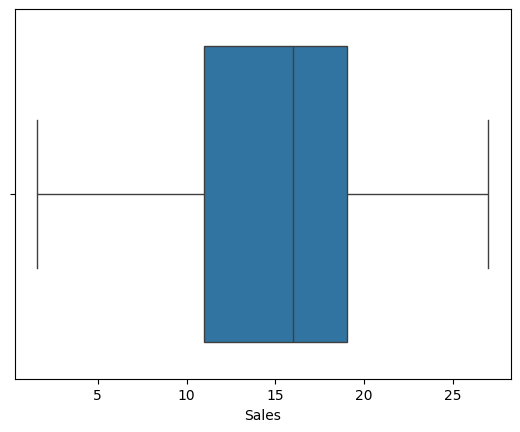

In [33]:
sns.boxplot(advertising['Sales'], orient='h')
plt.show()

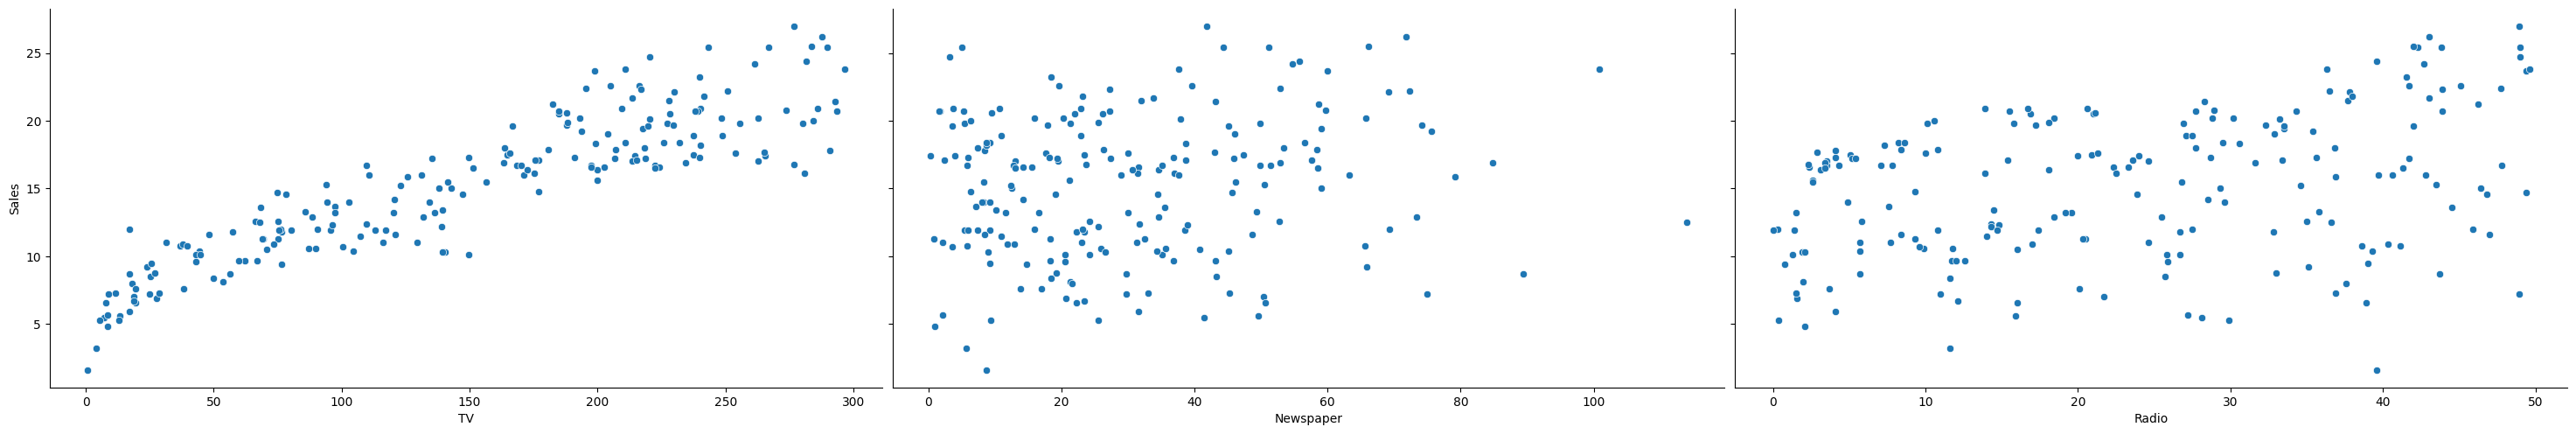

In [39]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=2, kind='scatter')
plt.show()

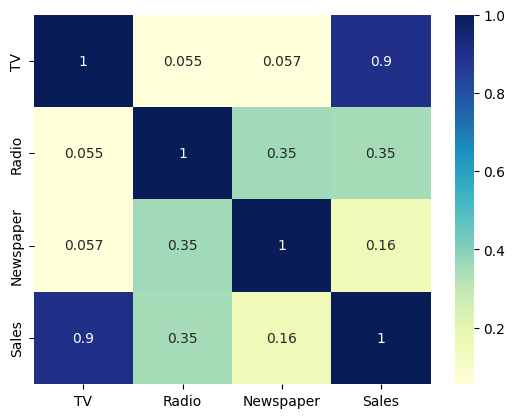

In [40]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()


"TV" is more influential and seems to be most correlated with `Sales'.

## Model 

Equation 
$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [52]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split



In [48]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 103.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 146.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 1.9 MB/s eta 0:00:06
   ---------------------------------------- 0.1/10.9 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/10.9 MB 2.5 MB/s eta 0:00:05
   - ------------------------

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X , y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:

X_train.head(3)

74     213.4
3      151.5
185    205.0
Name: TV, dtype: float64

In [56]:
y_train.head(3)

74     17.0
3      16.5
185    22.6
Name: Sales, dtype: float64

In [58]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.1 MB/s eta 0:00:09
    --------------------------------------- 0.2/9.8 MB 1.0 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.8 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.8 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/9.8 MB 1.0 MB/s eta 0:00:10
   -- ------------------------------------- 0.6/9.8 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/9.8 MB 1.1 MB/s eta 0:00:09
   -- --------------------

In [59]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [60]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [61]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [62]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.52e-52
Time:                        17:54:08   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

##### R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`



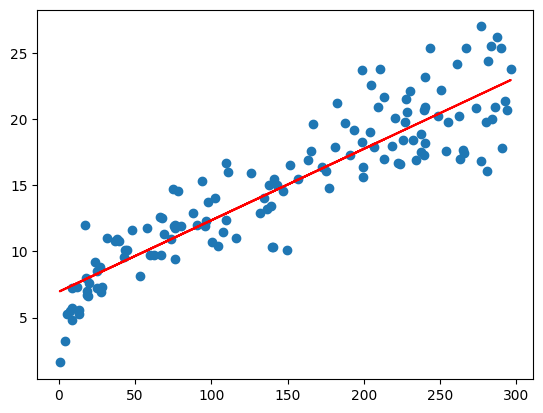

In [63]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

### Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\mdayy\AppData\Local\Temp\ipykernel_61592\3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


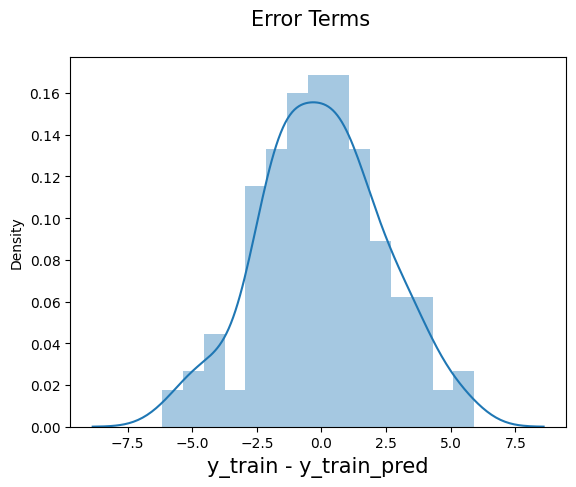

In [65]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

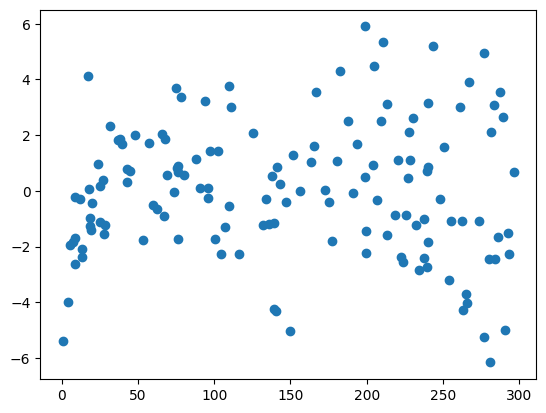

In [66]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [67]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [68]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [70]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

###### Checking the R-squared on the test set

In [71]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

##### Visualizing the fit on the test set

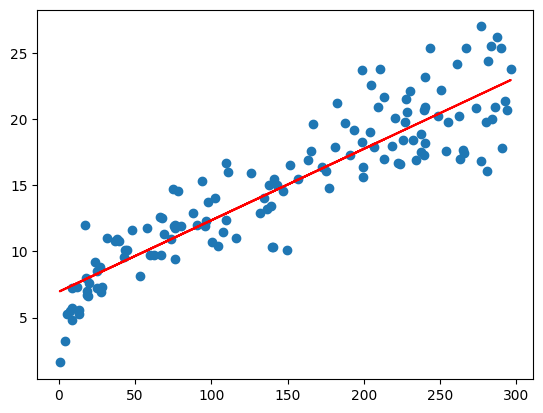

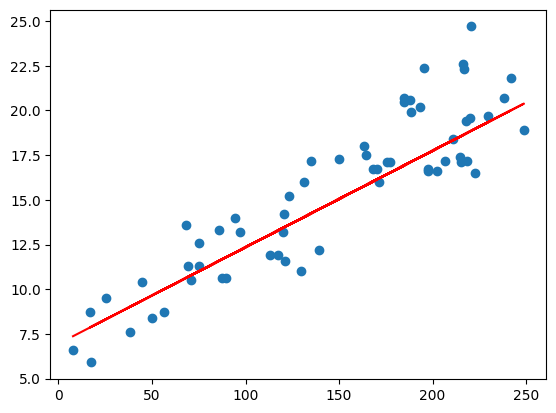

In [74]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

